In [1]:
import matplotlib.pyplot as plt
import cv2
%matplotlib inline
import numpy as np

In [2]:
import warnings
warnings.filterwarnings('ignore')

In [3]:
cat_example = cv2.imread('C:/Users/dhruv/DataScienceUdemy/ComputerVision/CATS_DOGS/train/CAT/5.jpg')

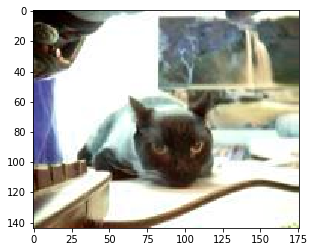

In [4]:
plt.imshow(cat_example)

In [5]:
cat_example = cv2.cvtColor(cat_example,cv2.COLOR_BGR2RGB)

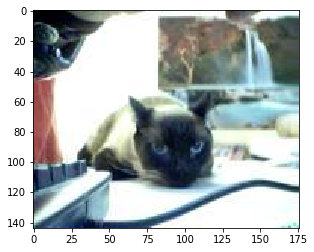

In [6]:
plt.imshow(cat_example)

In [7]:
cat_example.shape

(144, 176, 3)

In [8]:
dog_example = cv2.imread('C:/Users/dhruv/DataScienceUdemy/ComputerVision/CATS_DOGS/train/DOG/5.jpg')

In [9]:
dog_example = cv2.cvtColor(dog_example,cv2.COLOR_BGR2RGB)

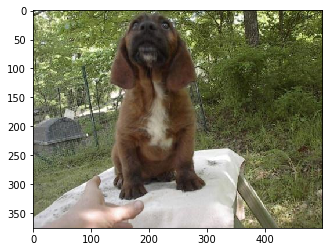

In [10]:
plt.imshow(dog_example)

In [11]:
dog_example.shape

(376, 500, 3)

In [13]:
dog_example[0].max()

255

In [14]:
cat_example[0].max()

255

In [15]:
from keras.preprocessing.image import ImageDataGenerator

In [16]:
image_gen = ImageDataGenerator(rotation_range=30,width_shift_range=0.1,height_shift_range=0.1,rescale=1/255,
                               shear_range=0.2,zoom_range=0.2,horizontal_flip=True,fill_mode='nearest')

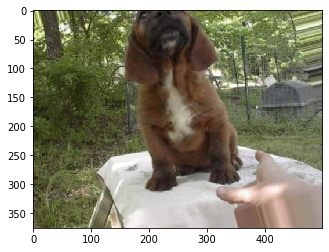

In [18]:
plt.imshow(image_gen.random_transform(dog_example))

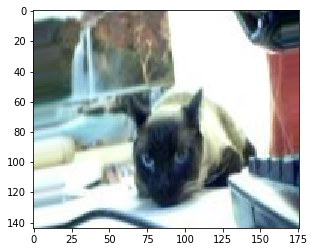

In [19]:
plt.imshow(image_gen.random_transform(cat_example))

Image generator

In [20]:
image_gen.flow_from_directory('C:/Users/dhruv/DataScienceUdemy/ComputerVision/CATS_DOGS/train')

Found 18743 images belonging to 2 classes.


In [22]:
training_images = image_gen.flow_from_directory('C:/Users/dhruv/DataScienceUdemy/ComputerVision/CATS_DOGS/train',
                                               target_size=(150,150),
                                                batch_size=16,class_mode='binary')

Found 18743 images belonging to 2 classes.


In [23]:
training_images.class_indices

{'CAT': 0, 'DOG': 1}

In [24]:
image_gen.flow_from_directory('C:/Users/dhruv/DataScienceUdemy/ComputerVision/CATS_DOGS/test')

Found 6251 images belonging to 2 classes.


In [25]:
testing_images = image_gen.flow_from_directory('C:/Users/dhruv/DataScienceUdemy/ComputerVision/CATS_DOGS/test',
                                               target_size=(150,150),
                                                batch_size=16,class_mode='binary')

Found 6251 images belonging to 2 classes.


In [26]:
input_shape = (150,150,3)

Model

In [19]:
from keras.models import Sequential
from keras.layers import Dense,Conv2D,Flatten,Dropout,MaxPooling2D

In [20]:
model = Sequential()

# sets of cnn layers
model.add(Conv2D(filters=32,kernel_size=(3,3),input_shape = input_shape,activation='relu'))
model.add(MaxPooling2D(pool_size=(2,2)))

model.add(Conv2D(filters=64,kernel_size=(3,3),input_shape = input_shape,activation='relu'))
model.add(MaxPooling2D(pool_size=(2,2)))

model.add(Conv2D(filters=64,kernel_size=(3,3),input_shape = input_shape,activation='relu'))
model.add(MaxPooling2D(pool_size=(2,2)))

# Flatten
model.add(Flatten())

# Dense
model.add(Dense(128,activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(1,activation='sigmoid'))

#Compile
model.compile(loss='binary_crossentropy',optimizer='adam',metrics=['accuracy'])

In [21]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_1 (Conv2D)            (None, 148, 148, 32)      896       
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 74, 74, 32)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 72, 72, 64)        18496     
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 36, 36, 64)        0         
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 34, 34, 64)        36928     
_________________________________________________________________
max_pooling2d_3 (MaxPooling2 (None, 17, 17, 64)        0         
_________________________________________________________________
flatten_1 (Flatten)          (None, 18496)            

In [26]:
results = model.fit_generator(generator=training_images,epochs=100,steps_per_epoch=150,validation_data=testing_images,validation_steps=12)

Epoch 1/100
150/150 [==============================] - 146s 973ms/step - loss: 0.7047 - accuracy: 0.5150 - val_loss: 0.6538 - val_accuracy: 0.5833
Epoch 2/100
150/150 [==============================] - 132s 880ms/step - loss: 0.6849 - accuracy: 0.5558 - val_loss: 0.6608 - val_accuracy: 0.5469
Epoch 3/100
150/150 [==============================] - 131s 873ms/step - loss: 0.6749 - accuracy: 0.5933 - val_loss: 0.6464 - val_accuracy: 0.5938
Epoch 4/100
150/150 [==============================] - 129s 863ms/step - loss: 0.6778 - accuracy: 0.5892 - val_loss: 0.7937 - val_accuracy: 0.5729
Epoch 5/100
150/150 [==============================] - 135s 897ms/step - loss: 0.6668 - accuracy: 0.6050 - val_loss: 0.6703 - val_accuracy: 0.6354
Epoch 6/100
150/150 [==============================] - 125s 832ms/step - loss: 0.6570 - accuracy: 0.6202 - val_loss: 0.6617 - val_accuracy: 0.5521
Epoch 7/100
150/150 [==============================] - 124s 826ms/step - loss: 0.6507 - accuracy: 0.6263 - val_loss: 0

Evaluate

In [29]:
results.history['accuracy']

[0.515,
 0.55583334,
 0.5933333,
 0.58916664,
 0.605,
 0.6202426,
 0.62625,
 0.6325,
 0.6275,
 0.6361355,
 0.65875,
 0.67,
 0.6641667,
 0.65791667,
 0.6745833,
 0.68,
 0.6816667,
 0.6616667,
 0.70556253,
 0.69,
 0.69875,
 0.7125,
 0.7158333,
 0.70625,
 0.7054167,
 0.73,
 0.72333336,
 0.71769136,
 0.73041666,
 0.7370833,
 0.7441667,
 0.7391667,
 0.7375,
 0.74529487,
 0.7345833,
 0.74083334,
 0.73583335,
 0.7583333,
 0.7495833,
 0.77458334,
 0.74375,
 0.7558333,
 0.78791666,
 0.76704305,
 0.77375,
 0.7704167,
 0.7658333,
 0.7675,
 0.77458334,
 0.77164364,
 0.76375,
 0.7658333,
 0.7683333,
 0.7866667,
 0.7808448,
 0.77916664,
 0.7895833,
 0.7816667,
 0.79333335,
 0.78333336,
 0.7825,
 0.77166665,
 0.785,
 0.79,
 0.7783333,
 0.7871184,
 0.795,
 0.8,
 0.785,
 0.78875,
 0.78291667,
 0.8045833,
 0.80541664,
 0.7895833,
 0.7996654,
 0.7920833,
 0.80291665,
 0.81,
 0.8045833,
 0.7991667,
 0.7975,
 0.8075,
 0.8218319,
 0.80333334,
 0.8020833,
 0.8,
 0.8125,
 0.80875,
 0.79833335,
 0.7966667,
 0.

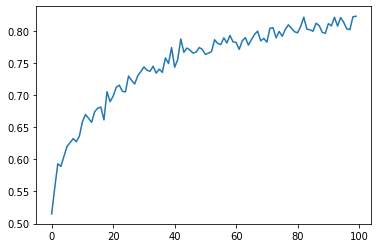

In [30]:
plt.plot(results.history['accuracy'])

Predict on new image

In [31]:
training_images.class_indices

{'CAT': 0, 'DOG': 1}

In [34]:
import numpy as np
from keras.preprocessing import image

dog_file = 'C:/Users/dhruv/DataScienceUdemy/ComputerVision/domestic-dog_thumb.jpg'

dog_img = image.load_img(dog_file, target_size=(150, 150))

dog_img = image.img_to_array(dog_img)

dog_img = np.expand_dims(dog_img, axis=0)
dog_img = dog_img/255

In [38]:
prediction_prob = model.predict_classes(dog_img)
print(prediction_prob)

[[1]]


In [36]:
# Output prediction
print(f'Probability that image is a dog is: {prediction_prob} ')

Probability that image is a dog is: [[0.7806734]] 


In [39]:
import numpy as np
from keras.preprocessing import image

cat_file = 'C:/Users/dhruv/DataScienceUdemy/ComputerVision/catty.jfif'

cat_img = image.load_img(cat_file, target_size=(150, 150))

cat_img = image.img_to_array(cat_img)

cat_img = np.expand_dims(cat_img, axis=0)
cat_img = cat_img/255

In [45]:
prediction_prob_2 = model.predict_classes(cat_img)
print(prediction_prob_2)

[[0]]
